In [1]:
import scanpy as sc
from pathlib import Path
import pandas as pd
import squidpy as sq
from sklearn.preprocessing import MinMaxScaler

# from muon import prot as pt
# from muon import MuData
# import muon as mu
import numpy as np
from jax.config import config

config.update("jax_enable_x64", True)
import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
%load_ext autoreload
%autoreload 2
%load_ext lab_black

path_data = Path("/lustre/groups/ml01/workspace/moscot_paper/mapping")

['default', 'despine']


In [5]:
adata_spatial_prot = sc.read(path_data / "adata_spatial_protein_out.h5ad")
adata_p = sc.read(path_data / "adata_cite_processed.h5ad")
adata_spatial = sc.read(path_data / "adata_spatial_out.h5ad")
adata_sc = sc.read(path_data / "adata_sc_out.h5ad")

In [ ]:
sc.tl.rank_genes_groups(adata_spatial_prot, groupby="leiden_map")

In [ ]:
sc.tl.rank_genes_groups(adata_p, "annot")

In [ ]:
sc.get.rank_genes_groups_df(adata_p, "Neutrophils").head(10)

In [ ]:
sc.get.rank_genes_groups_df(adata_spatial_prot, "Neutrophil").head(10)

In [ ]:
adata_spatial_prot.obs["leiden_map"] = adata_spatial.obs["leiden_map"].copy()

In [ ]:
sc.set_figure_params(figsize=(3, 3), dpi=100)
sq.pl.spatial_scatter(adata_spatial_prot, shape=None, color=["leiden_map", "Ly6G", "CD24", "CD11b_mh"],
    groups="Neutrophil",)

/home/icb/giovanni.palla/miniconda3/envs/moscot/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


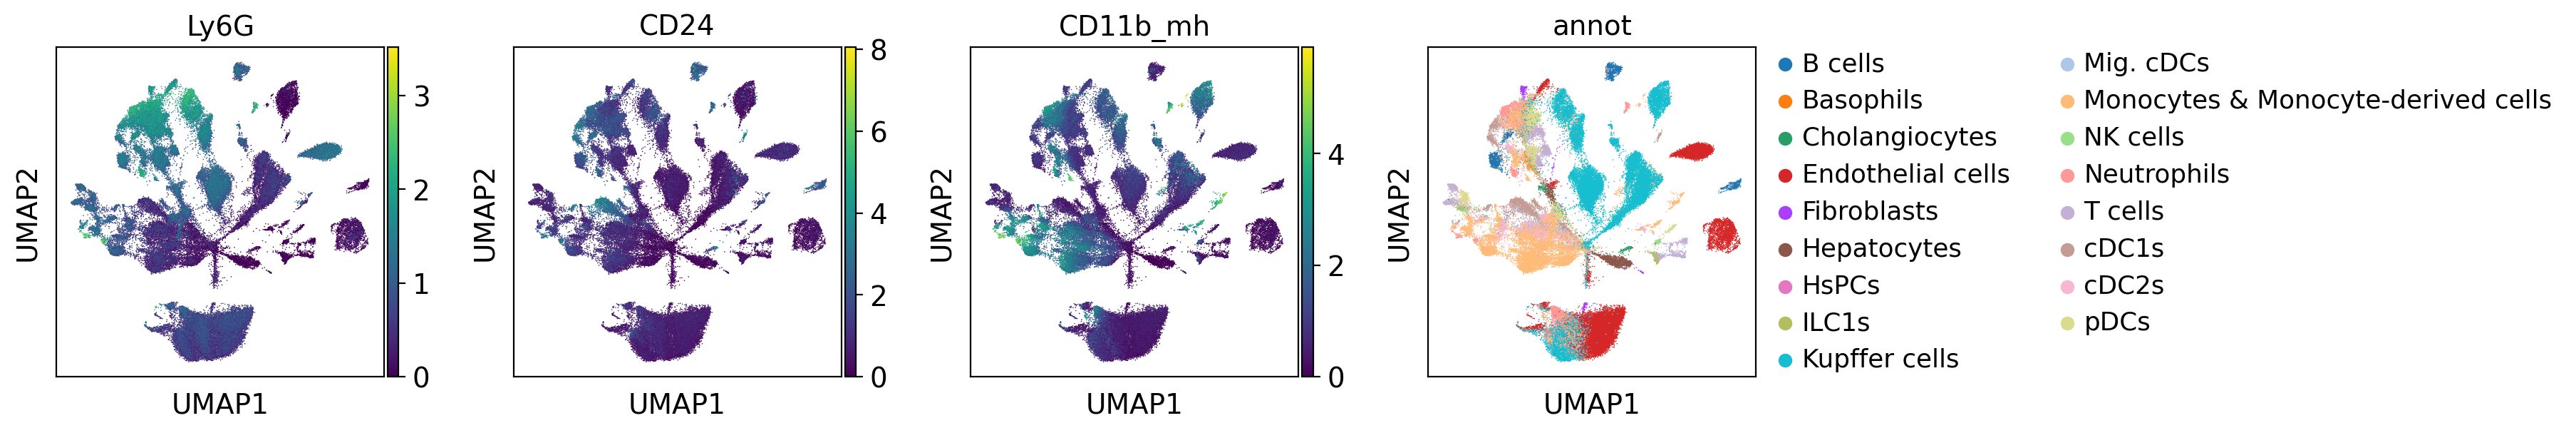

<Figure size 300x300 with 0 Axes>

In [60]:
sc.pl.umap(
    adata_p,
    color=["Ly6G", "CD24", "CD11b_mh", "annot"],
)
plt.tight_layout()

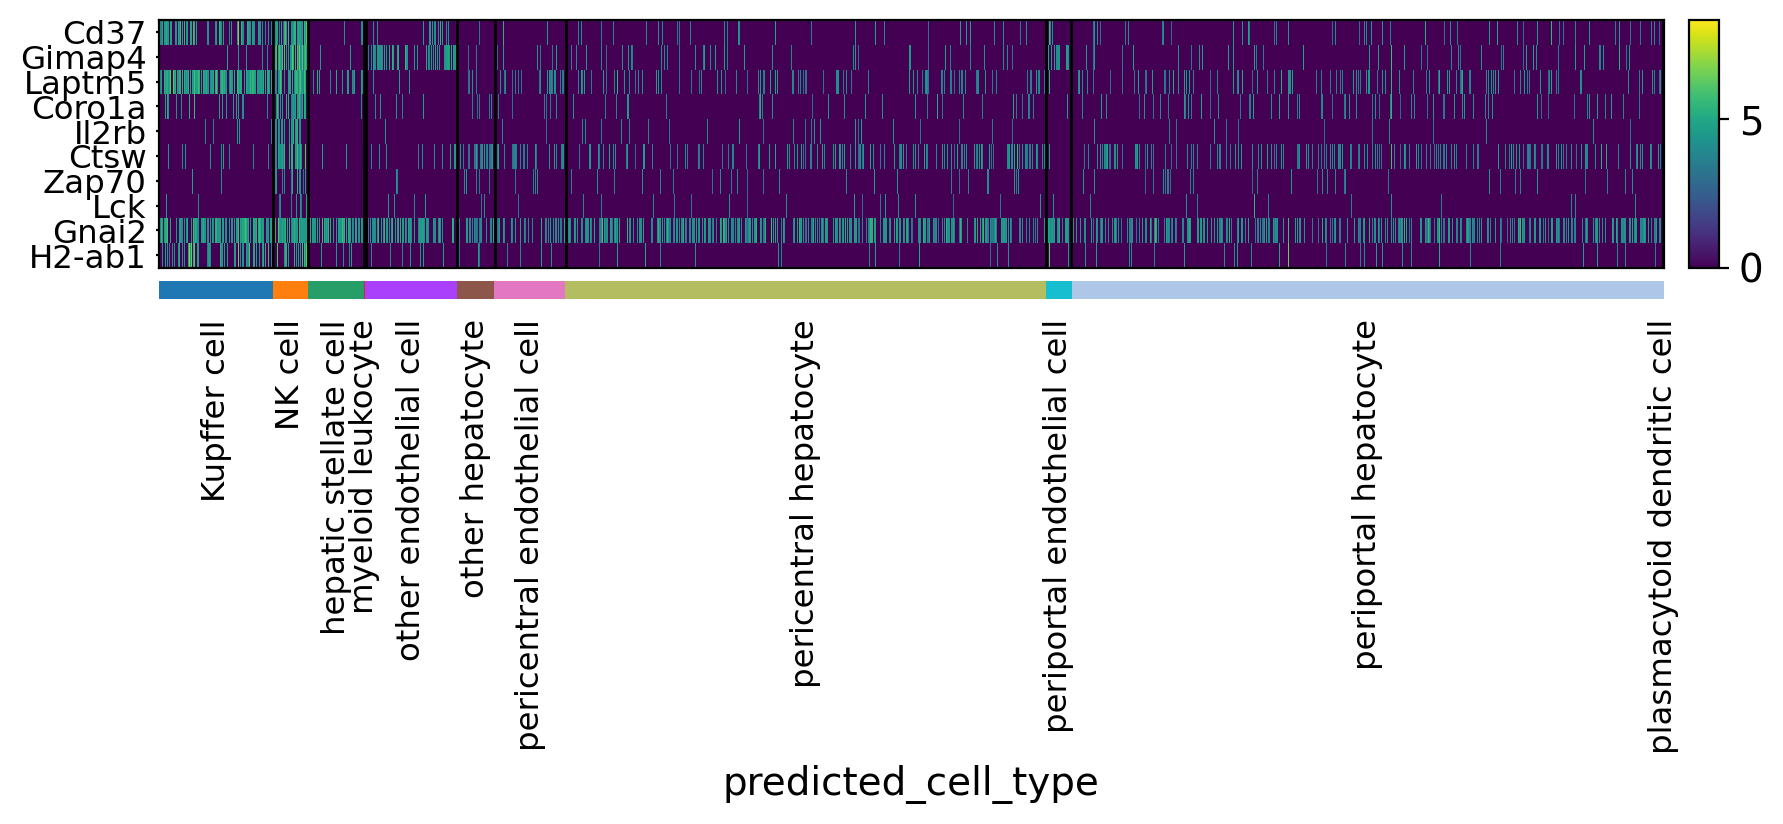

In [46]:
sc.pl.heatmap(
    adata_spatial,
    df_genes.names.values,
    groupby="predicted_cell_type",
    swap_axes=True,
)